In [1]:
from utils.io import load_yaml

import os
import pandas as pd

# Load F-MAP Log

In [2]:
def load_cevncf_fmap_log(folder_path):
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                 if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]
    aggregate_result = pd.DataFrame()
    for record in csv_files:
        df = pd.read_csv(record)
        aggregate_result = aggregate_result.append(df.groupby(['model'], as_index=False)
 .agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'}))
    return aggregate_result

In [3]:
def load_fmap_log(folder_path):
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                 if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]
    aggregate_result = pd.DataFrame()
    for record in csv_files:
        df = pd.read_csv(record)
        aggregate_result = aggregate_result.append(df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
 .agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])
    return aggregate_result

In [4]:
df_cdsvinyl_zeroout = load_fmap_log(folder_path='tables/CDsVinyl_fmap_zeroout/')
df_cdsvinyl_re = load_fmap_log(folder_path='tables/CDsVinyl_fmap/')
df_cdsvinyl_lb = load_fmap_log(folder_path='tables/CDsVinyl_fmap_lb/')

In [5]:
filtered_df_cdsvinyl_zeroout = df_cdsvinyl_zeroout
filtered_df_cdsvinyl_re = df_cdsvinyl_re
filtered_df_cdsvinyl_lb = df_cdsvinyl_lb

In [6]:
# filtered_df_cdsvinyl_zeroout = df_cdsvinyl_zeroout.loc[(df_cdsvinyl_zeroout['F-MAP@5'] != 0) & (df_cdsvinyl_zeroout['F-MAP@10'] != 0) & (df_cdsvinyl_zeroout['F-MAP@20'] != 0)]
# filtered_df_cdsvinyl_re = df_cdsvinyl_re.loc[(df_cdsvinyl_re['F-MAP@5'] != 0) & (df_cdsvinyl_re['F-MAP@10'] != 0) & (df_cdsvinyl_re['F-MAP@20'] != 0)]
# filtered_df_cdsvinyl_lb = df_cdsvinyl_lb.loc[(df_cdsvinyl_lb['F-MAP@5'] != 0) & (df_cdsvinyl_lb['F-MAP@10'] != 0) & (df_cdsvinyl_lb['F-MAP@20'] != 0)]

In [7]:
filtered_df_cdsvinyl_zeroout.loc[filtered_df_cdsvinyl_zeroout['beta']==0.001].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,0.001,0.01,1,1,1,0.0001,600,0.4,Adam,0.026839,0.02717,0.027013


In [8]:
filtered_df_cdsvinyl_re.loc[filtered_df_cdsvinyl_re['beta']==0.01].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,0.01,0.001,1,1,1,0.0001,600,0.4,Adam,0.031856,0.032012,0.031718


In [9]:
filtered_df_cdsvinyl_lb.loc[filtered_df_cdsvinyl_lb['beta']==1].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,1.0,0.01,1,1,1,0.0001,600,0.4,Adam,-0.00472,-0.005788,-0.001813


In [10]:
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def pandas_bar_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
#     fig, ax = plt.subplots(figsize=(3, 3))
    fig, ax = plt.subplots(figsize=(4, 2))
    sns.barplot(ax=ax, x=x, y=y, hue=hue, data=df, errwidth=1, edgecolor='black', facecolor=(1, 1, 1, 0)) #, errwidth=0.5

    num_category = len(df[x].unique())
    hatch = None
    hatches = itertools.cycle(['//', '\\\\\\\\', ' ', '////', '**', '----', 'xxxx', '\\', '...', 'OOO', "++++++++"])
    for i, bar in enumerate(ax.patches):
        if i % num_category == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper left', ncol=5)
    # if 'Precision' not in y:
    ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_bar.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_bar.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(6, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=4)
        ax_leg.axis('off')
        fig_leg.savefig('figs/bar_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

In [11]:
def return_barplot_df(df):
    df_fmap5 = df[['model', 'F-MAP@5']]
    df_fmap5.loc[:, 'Metric'] = ['F-MAP@5']*len(df_fmap5)
    df_fmap5.rename(columns={'F-MAP@5':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap10 = df[['model', 'F-MAP@10']]
    df_fmap10.loc[:, 'Metric'] = ['F-MAP@10']*len(df_fmap10)
    df_fmap10.rename(columns={'F-MAP@10':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap20 = df[['model', 'F-MAP@20']]
    df_fmap20.loc[:, 'Metric'] = ['F-MAP@20']*len(df_fmap20)
    df_fmap20.rename(columns={'F-MAP@20':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap5 = df_fmap5.sort_values('Model', ascending=False)
    df_fmap10 = df_fmap10.sort_values('Model', ascending=False)
    df_fmap20 = df_fmap20.sort_values('Model', ascending=False)

    makeup_df = df_fmap5.append(df_fmap10).append(df_fmap20)

    makeup_df['Metric'] = makeup_df['Metric'].apply(lambda m: m.replace('F-MAP@', 'N='))
    
    return makeup_df

In [12]:
bar_df_cdsvinyl_zeroout = return_barplot_df(filtered_df_cdsvinyl_zeroout.loc[filtered_df_cdsvinyl_zeroout['beta'] == 0.001])
bar_df_cdsvinyl_zeroout['Model'] = 'CE-VAE-ZO'
bar_df_cdsvinyl_re = return_barplot_df(filtered_df_cdsvinyl_re.loc[filtered_df_cdsvinyl_re['beta'] == 0.01])
bar_df_cdsvinyl_re['Model'] = 'CE-VAE-ER'
bar_df_cdsvinyl_lb = return_barplot_df(filtered_df_cdsvinyl_lb.loc[filtered_df_cdsvinyl_lb['beta'] == 1])
bar_df_cdsvinyl_lb['Model'] = 'CE-VAE-LB'

/home/kai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/kai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/kai/.local/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [13]:
filtered_df_cdsvinyl_cevncf = load_cevncf_fmap_log("tables/CDsVinyl_fmap/CE_VNCF/")

In [14]:
bar_df_cdsvinyl_cevncf = return_barplot_df(filtered_df_cdsvinyl_cevncf)
bar_df_cdsvinyl_cevncf['Model'] = 'CE-VNCF-ZO'

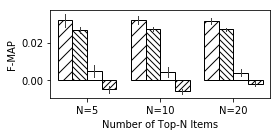

In [15]:
pandas_bar_plot(df=bar_df_cdsvinyl_re.append(bar_df_cdsvinyl_zeroout).append(bar_df_cdsvinyl_cevncf).append(bar_df_cdsvinyl_lb), x='Metric', y='F-MAP', hue='Model', x_name='Number of Top-N Items', y_name='F-MAP', folder="CDsVinyl", name='CDsVinyl_FMAP_Redistribution_Zero_Out', save=True)

In [15]:
df_cdsvinyl_lb = load_fmap_log(folder_path='tables/CDsVinyl_fmap_lb/')

In [16]:
(df_cdsvinyl_lb.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.033634,0.030128,0.025653
1,E-CDE-VAE,200,0.0001,0.01,1,1,1,0.0001,600,0.4,Adam,0.036114,0.032613,0.029066
2,E-CDE-VAE,200,0.0010,0.01,1,1,1,0.0001,600,0.4,Adam,0.030530,0.026232,0.022927
3,E-CDE-VAE,200,0.0100,0.01,1,1,1,0.0001,600,0.4,Adam,0.025599,0.021455,0.020766
4,E-CDE-VAE,200,0.1000,0.01,1,1,1,0.0001,600,0.4,Adam,0.021963,0.020759,0.021184
5,E-CDE-VAE,200,1.0000,0.01,1,1,1,0.0001,600,0.4,Adam,-0.004720,-0.005788,-0.001813


In [33]:
df_beer_lb = load_fmap_log(folder_path='tables/beer_fmap_lb/')

In [34]:
(df_beer_lb.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.010478,0.010384,0.009817
1,E-CDE-VAE,100,0.0001,0.001,1,1,1,0.0005,600,0.4,Adam,0.007690,0.007893,0.007944
2,E-CDE-VAE,100,0.0010,0.001,1,1,1,0.0005,600,0.4,Adam,0.006253,0.006322,0.006093
3,E-CDE-VAE,100,0.0100,0.001,1,1,1,0.0005,600,0.4,Adam,-0.004832,-0.004345,-0.003373
4,E-CDE-VAE,100,0.1000,0.001,1,1,1,0.0005,600,0.4,Adam,0.010646,0.002306,-0.003458
5,E-CDE-VAE,100,1.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.015349,0.003478,-0.001930


In [27]:
df = pd.read_csv("tables/beer_fmap/CE_VNCF/beer_Critiquing_FMAP.csv")

In [28]:
df_CEVNCF = df

In [26]:
#df_CEVNCF = df.loc[df['model'] == 'CE-VNCF'].reset_index(drop=True)

In [31]:
for i in range(95):
    filename = 'tables/beer_fmap/CE_VNCF/beer_CEVNCF_Critiquing' + str(i+1) + '_FMAP.csv'
    df.iloc[500*i:500*(i+1)].reset_index(drop=True).to_csv(filename,index=False)

In [26]:
df_CEVNCF.iloc[:500,:].to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing6_FMAP.csv',index=False)

In [27]:
df_CEVNCF.iloc[500:1000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing7_FMAP.csv',index=False)

In [28]:
df_CEVNCF.iloc[1000:1500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing8_FMAP.csv',index=False)

In [29]:
df_CEVNCF.iloc[1500:2000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing9_FMAP.csv',index=False)

In [30]:
df_CEVNCF.iloc[2000:2500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing10_FMAP.csv',index=False)

In [31]:
df_CEVNCF.iloc[2500:3000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing11_FMAP.csv',index=False)

In [32]:
df_CEVNCF.iloc[3000:3500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing12_FMAP.csv',index=False)

In [33]:
df_CEVNCF.iloc[3500:4000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing13_FMAP.csv',index=False)

In [34]:
df_CEVNCF.iloc[4000:4500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing14_FMAP.csv',index=False)

In [35]:
df_CEVNCF.iloc[4500:5000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing15_FMAP.csv',index=False)

In [4]:
df_cdsvinyl_ub = load_fmap_log(folder_path='tables/CDsVinyl_fmap_ub/')

In [5]:
(df_cdsvinyl_ub.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.677152,0.666540,0.658832
1,E-CDE-VAE,200,0.0001,0.01,1,1,1,0.0001,600,0.4,Adam,0.677152,0.666888,0.658904
2,E-CDE-VAE,200,0.0010,0.01,1,1,1,0.0001,600,0.4,Adam,0.684948,0.672657,0.662902
3,E-CDE-VAE,200,0.0100,0.01,1,1,1,0.0001,600,0.4,Adam,0.675847,0.663338,0.654760
4,E-CDE-VAE,200,0.1000,0.01,1,1,1,0.0001,600,0.4,Adam,0.695062,0.682725,0.672852
5,E-CDE-VAE,200,1.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.714866,0.703364,0.692310


In [6]:
df_beer_ub = load_fmap_log(folder_path='tables/beer_fmap_ub/')

In [7]:
(df_beer_ub.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.376708,0.375052,0.372446
1,E-CDE-VAE,100,0.0001,0.001,1,1,1,0.0005,600,0.4,Adam,0.355782,0.353362,0.349904
2,E-CDE-VAE,100,0.0010,0.001,1,1,1,0.0005,600,0.4,Adam,0.192229,0.194329,0.196866
3,E-CDE-VAE,100,0.0100,0.001,1,1,1,0.0005,600,0.4,Adam,0.152278,0.154546,0.156929
4,E-CDE-VAE,100,0.1000,0.001,1,1,1,0.0005,600,0.4,Adam,0.456953,0.457382,0.455253
5,E-CDE-VAE,100,1.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.590105,0.589195,0.590369


# Beer

In [16]:
df_beer_zeroout = load_fmap_log(folder_path='tables/beer_fmap_zeroout/')
df_beer_re = load_fmap_log(folder_path='tables/beer_fmap/')
df_beer_lb = load_fmap_log(folder_path='tables/beer_fmap_lb/')

In [17]:
filtered_df_beer_zeroout = df_beer_zeroout
filtered_df_beer_re = df_beer_re
filtered_df_beer_lb = df_beer_lb

In [18]:
# filtered_df_beer_zeroout = df_beer_zeroout.loc[(df_beer_zeroout['F-MAP@5'] != 0) & (df_beer_zeroout['F-MAP@10'] != 0) & (df_beer_zeroout['F-MAP@20'] != 0)]
# filtered_df_beer_re = df_beer_re.loc[(df_beer_re['F-MAP@5'] != 0) & (df_beer_re['F-MAP@10'] != 0) & (df_beer_re['F-MAP@20'] != 0)]
# filtered_df_beer_lb = df_beer_lb.loc[(df_beer_lb['F-MAP@5'] != 0) & (df_beer_lb['F-MAP@10'] != 0) & (df_beer_lb['F-MAP@20'] != 0)]

In [19]:
filtered_df_beer_zeroout.loc[filtered_df_beer_zeroout['beta']==0.0001].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.0001,0.001,1,1,1,0.0005,600,0.4,Adam,0.029624,0.028267,0.026272


In [20]:
filtered_df_beer_re.loc[filtered_df_beer_re['beta']==1e-7].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,1.000000e-07,0.001,1,1,1,0.0005,600,0.4,Adam,0.032347,0.030943,0.02869


In [21]:
filtered_df_beer_lb.loc[filtered_df_beer_lb['beta']==0.001].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.001,0.001,1,1,1,0.0005,600,0.4,Adam,0.006686,0.006559,0.006276


In [22]:
bar_df_beer_zeroout = return_barplot_df(filtered_df_beer_zeroout.loc[filtered_df_beer_zeroout['beta'] == 0.0001])
bar_df_beer_zeroout['Model'] = 'CE-VAE-ZO'
bar_df_beer_re = return_barplot_df(filtered_df_beer_re.loc[filtered_df_beer_re['beta'] == 1e-7])
bar_df_beer_re['Model'] = 'CE-VAE-ER'
bar_df_beer_lb = return_barplot_df(filtered_df_beer_lb.loc[filtered_df_beer_lb['beta'] == 0.001])
bar_df_beer_lb['Model'] = 'CE-VAE-LB'

In [23]:
filtered_df_beer_cevncf = load_cevncf_fmap_log("tables/beer_fmap/CE_VNCF/")

In [24]:
bar_df_beer_cevncf = return_barplot_df(filtered_df_beer_cevncf)
bar_df_beer_cevncf['Model'] = 'CE-VNCF-ZO'

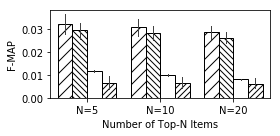

In [25]:
pandas_bar_plot(df=bar_df_beer_re.append(bar_df_beer_zeroout).append(bar_df_beer_cevncf).append(bar_df_beer_lb), x='Metric', y='F-MAP', hue='Model', x_name='Number of Top-N Items', y_name='F-MAP', folder="beer", name='beer_FMAP_Redistribution_Zero_Out', save=True)